In [1]:
library(magrittr)
library(tidyverse)
library(readxl)
library(kableExtra)
library(summarytools)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Warning message:
“sem variável DISPLAY então Tk não está disponível”
system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)

For best results, restart R session and update

In [2]:
games <- read_csv("../dataset/games.csv")
games_details <- read_csv("../dataset/games_details.csv")
players <- read_csv("../dataset/players.csv")
ranking <- read_csv("../dataset/ranking.csv")
teams <- read_csv("../dataset/teams.csv")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  GAME_DATE_EST = col_date(format = ""),
  GAME_STATUS_TEXT = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  TEAM_ABBREVIATION = col_character(),
  TEAM_CITY = col_character(),
  PLAYER_NAME = col_character(),
  START_POSITION = col_character(),
  COMMENT = col_character(),
  MIN = col_time(format = "")
)
ℹ Use `spec()` for the full column specifications.


Warning message:
“25009 parsing failures.
 row col       expected actual                           file
1521 MIN valid duration  27:60 '../dataset/games_details.csv'
2058 MIN valid duration  10:60 '../dataset

In [3]:
ranking_total <- ranking %>%
    group_by(TEAM_ID) %>%
    summarise(per_W=(sum(W)/sum(G)) * 100) %>%
    inner_join(teams, by = "TEAM_ID") %>%
    select(NICKNAME, per_W) %>%
    arrange(desc(per_W)) 

ranking_total

NICKNAME,per_W
<chr>,<dbl>
Spurs,68.43183
Rockets,59.65185
Mavericks,58.69039
Celtics,56.90926
Heat,56.68913
Nuggets,56.08854
Thunder,55.49785
Warriors,54.09769
Pacers,53.63205


In [4]:
knitr::kable(ranking_total, col.names = c("Times", "Aproveitamento (% de vitórias)"), digits = 2, format.args = list(decimal=","))

<table>
 <thead>
  <tr>
   <th style="text-align:left;"> Times </th>
   <th style="text-align:right;"> Aproveitamento (% de vitórias) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Spurs </td>
   <td style="text-align:right;"> 68,43 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Rockets </td>
   <td style="text-align:right;"> 59,65 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Mavericks </td>
   <td style="text-align:right;"> 58,69 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Celtics </td>
   <td style="text-align:right;"> 56,91 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Heat </td>
   <td style="text-align:right;"> 56,69 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Nuggets </td>
   <td style="text-align:right;"> 56,09 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Thunder </td>
   <td style="text-align:right;"> 55,50 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Warriors </td>
   <td style="text-align:r

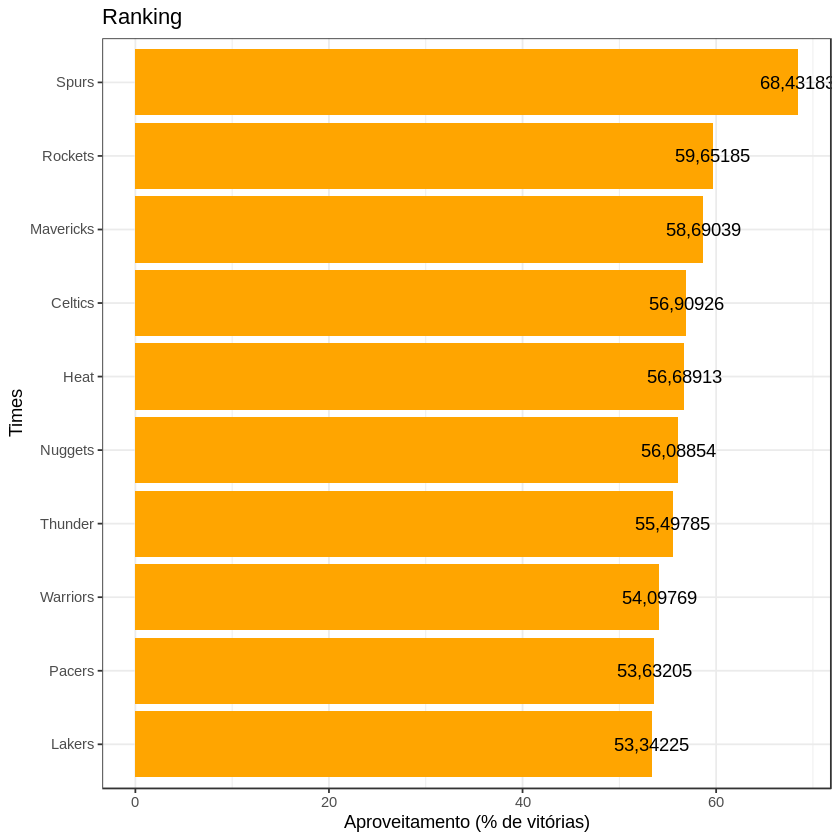

In [4]:
ranking_total %>%
 mutate(NICKNAME=fct_reorder(NICKNAME, per_W)) %>%
 slice_head(n=10) %>%
 ggplot(aes(x=NICKNAME, y=per_W),width = 3, height = 3, dpi = 300, filename="racking.png") +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(per_W, nsmall=2, decimal=",")), color="black") +
    coord_flip() +
    ggtitle("Ranking") +
    xlab("Times") +
    ylab("Aproveitamento (% de vitórias)") +
    theme_bw()

In [8]:
knitr::kable(ranking_total, col.names = c("Times", "Aproveitamento (% de vitórias)"), format = "latex", escape = TRUE)


\begin{tabular}{l|r}
\hline
Times & Aproveitamento (\% de vitórias)\\
\hline
Spurs & 68.43183\\
\hline
Rockets & 59.65185\\
\hline
Mavericks & 58.69039\\
\hline
Celtics & 56.90926\\
\hline
Heat & 56.68913\\
\hline
Nuggets & 56.08854\\
\hline
Thunder & 55.49785\\
\hline
Warriors & 54.09769\\
\hline
Pacers & 53.63205\\
\hline
Lakers & 53.34225\\
\hline
Jazz & 53.25233\\
\hline
Clippers & 51.96243\\
\hline
Trail Blazers & 51.53559\\
\hline
Raptors & 51.46103\\
\hline
Cavaliers & 50.21361\\
\hline
Bulls & 49.60749\\
\hline
Grizzlies & 49.32265\\
\hline
Pistons & 49.15510\\
\hline
Suns & 48.77784\\
\hline
Bucks & 47.69005\\
\hline
Magic & 46.17142\\
\hline
Pelicans & 46.03790\\
\hline
Hawks & 45.77080\\
\hline
76ers & 43.14066\\
\hline
Wizards & 42.91554\\
\hline
Nets & 41.91851\\
\hline
Kings & 40.73309\\
\hline
Hornets & 39.38039\\
\hline
Knicks & 38.97633\\
\hline
Timberwolves & 38.28321\\
\hline
\end{tabular}

In [5]:
ranking$SEASON_ID = as.character(ranking$SEASON_ID)

season <- ranking %>%
    mutate(SEASON_ID=substr(SEASON_ID, 2,5)) %>%
    filter(G != 0) %>%
    inner_join(teams, by = "TEAM_ID") %>%
    group_by(NICKNAME, SEASON_ID, CONFERENCE) %>%
    summarise(per_W=(sum(W)/sum(G)) * 100) %>%
    arrange(SEASON_ID)

glimpse(season)

head(season,200)


`summarise()` has grouped output by 'NICKNAME', 'SEASON_ID'. You can override using the `.groups` argument.



Rows: 568
Columns: 4
Groups: NICKNAME, SEASON_ID [568]
$ NICKNAME   <chr> "76ers", "Bucks", "Bulls", "Cavaliers", "Celtics", "Clipper…
$ SEASON_ID  <chr> "2002", "2002", "2002", "2002", "2002", "2002", "2002", "20…
$ CONFERENCE <chr> "East", "East", "East", "East", "East", "West", "West", "Ea…
$ per_W      <dbl> 58.53659, 51.21951, 36.58537, 20.73171, 53.65854, 32.92683,…


NICKNAME,SEASON_ID,CONFERENCE,per_W
<chr>,<chr>,<chr>,<dbl>
76ers,2002,East,58.53659
Bucks,2002,East,51.21951
Bulls,2002,East,36.58537
Cavaliers,2002,East,20.73171
Celtics,2002,East,53.65854
Clippers,2002,West,32.92683
Grizzlies,2002,West,34.14634
Hawks,2002,East,42.68293
Heat,2002,East,30.48780


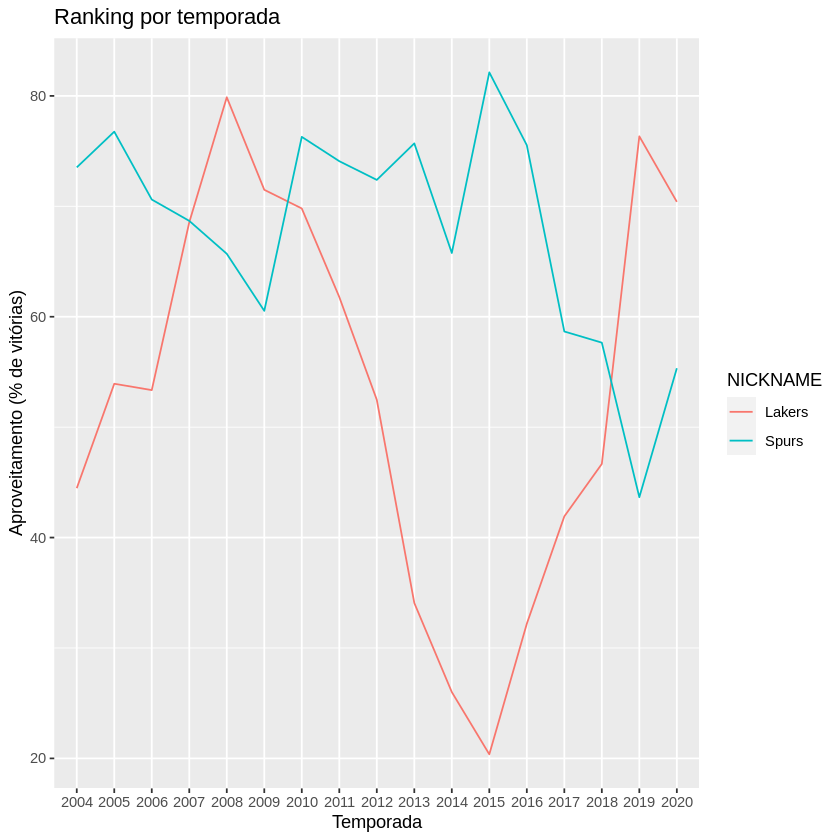

In [18]:
season %>%
    filter(NICKNAME == "Spurs" | NICKNAME =="Lakers", SEASON_ID > 2003 ) %>%
    ggplot(aes(x = SEASON_ID, y = per_W, group = NICKNAME)) +
    geom_line(aes(color = NICKNAME)) +
    ggtitle("Ranking por temporada") +
    xlab("Temporada") +
    ylab("Aproveitamento (% de vitórias)")

ggsave("teste.png", width = 40, height = 15, units = "cm")

In [12]:
 summary(season)

   NICKNAME          SEASON_ID          CONFERENCE            per_W      
 Length:568         Length:568         Length:568         Min.   :11.47  
 Class :character   Class :character   Class :character   1st Qu.:39.58  
 Mode  :character   Mode  :character   Mode  :character   Median :50.56  
                                                          Mean   :49.99  
                                                          3rd Qu.:60.91  
                                                          Max.   :89.86  